In [41]:
import pandas as pd
data = pd.read_csv('data_breast.csv', delimiter = ',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
data.drop(columns =['id', 'Unnamed: 32'], inplace=True)

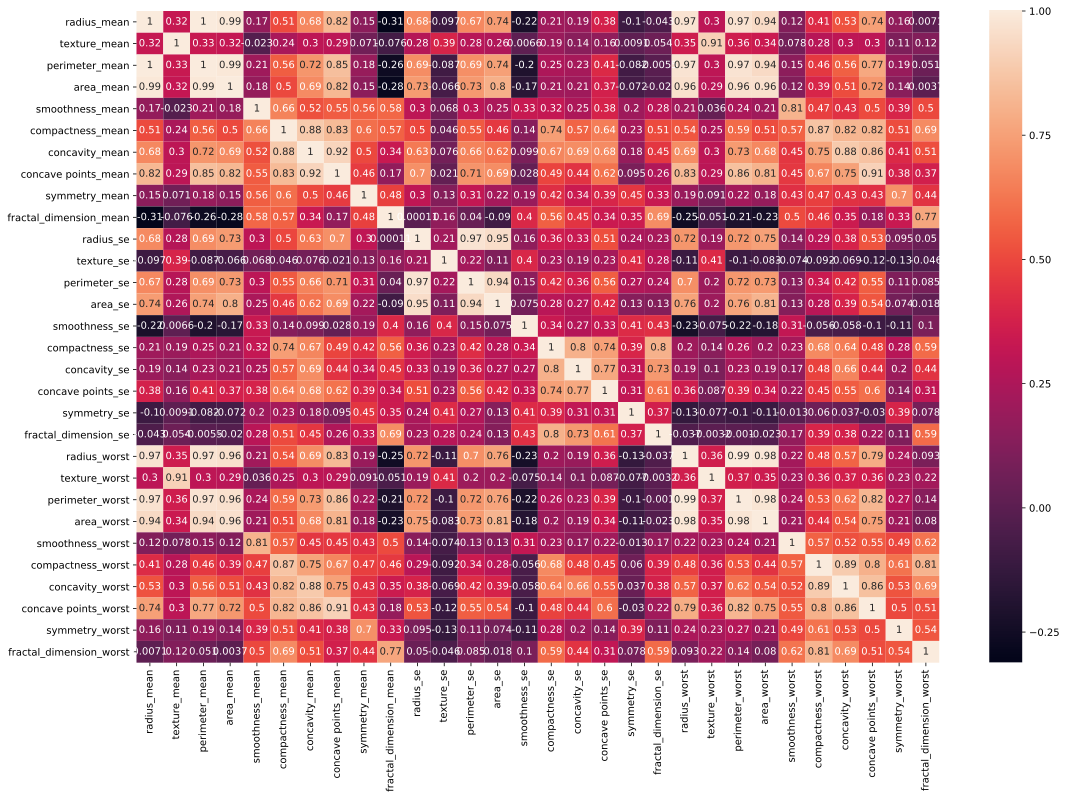

In [44]:
import seaborn as sns
corr_matrix = data.corr()
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_matrix,annot=True)

In [45]:
#статистики для каждой колонки
statistics = {}
for col in data.columns.values:
    if col == 'diagnosis': continue
    mean = sum(data[col]) / (len(data[col])-1)
    std_dev = (sum([(el-mean)**2 for el in data[col]]) / (len(data[col])-1))**0.5
    median = (sorted(data[col])[len(data[col])//2] + sorted(data[col])[len(data[col])//2-1]) / 2
    mode = data[col].mode()
    maxi = max(data[col])
    mini = min(data[col])
    statistics[col] = [mean, std_dev, median, mode[0], maxi, mini]
statistics['name'] = ['mean', 'std_dev', 'median', 'mode', 'max', 'min']
pd.DataFrame(data=statistics).set_index('name')
    

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
name,,,,,,,,,,,,,,,,,,,,,
mean,14.152164,19.323609,92.130951,656.042077,0.096530,0.104525,0.088956,0.049005,0.181481,0.062908,...,16.297833,25.722430,107.450053,882.133451,0.132602,0.254713,0.272668,0.114808,0.290586,0.084094
std_dev,3.524137,4.301170,24.299521,351.916021,0.014065,0.052813,0.079720,0.038803,0.027416,0.007061,...,4.833327,6.146424,33.603074,569.359107,0.022834,0.157337,0.208625,0.065733,0.061870,0.018062
median,13.355000,18.835000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.965000,25.405000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
mode,12.340000,14.930000,82.610000,512.200000,0.100700,0.114700,0.000000,0.000000,0.160100,0.056670,...,12.360000,17.700000,101.700000,284.400000,0.121600,0.148600,0.000000,0.000000,0.222600,0.074270
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040


In [46]:
def change_values(inp):
    if inp == 'M':
        return 1
    return 0
data['diagnosis'] = data['diagnosis'].apply(change_values)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0,0.5,'explained_variance_ratio_')

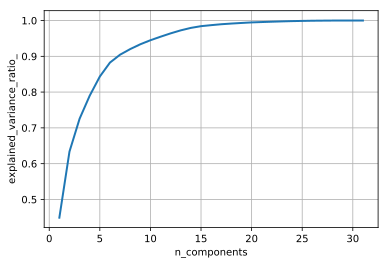

In [48]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
pca = PCA().fit(scaled)
cum_evr = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(cum_evr.size) + 1
plt.plot(x, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [49]:
from scipy import stats as sts
print(sts.ttest_ind(data['radius_mean'], data['radius_worst']))

Ttest_indResult(statistic=-8.541614307530965, pvalue=4.199065819115273e-17)


In [52]:
#сделаем данные для PCA 
from sklearn.model_selection import train_test_split
y = data['diagnosis']
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(scaled, y, test_size=0.33, random_state=42)
'''pca_x_train.drop(labels='diagnosis', axis = 1, inplace = True)
pca_x_test.drop(labels='diagnosis', axis = 1, inplace = True)'''

pca_x_train = pca.transform(scaler.fit_transform(pca_x_train))
pca_x_test = pca.transform(scaler.fit_transform(pca_x_test))

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc_pca = RandomForestClassifier()
rfc_pca.fit(pca_x_train, pca_y_train)
rfc_pca.predict(pca_x_test)
rfc_pca.score(pca_x_test,pca_y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9521276595744681

In [ ]:
#сделаем данные для моделей без PCA

In [58]:
y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
x_train.drop(labels='diagnosis', axis = 1, inplace = True)
x_test.drop(labels='diagnosis', axis = 1, inplace = True)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.predict(x_test)
rfc.score(x_test, y_test)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9627659574468085

In [59]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test)
logisticRegr.score(x_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9574468085106383

In [60]:
from sklearn.metrics import classification_report
print(classification_report(logisticRegr.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

   micro avg       0.96      0.96      0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

